In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
from datetime import timezone
from dateutil.tz import *
import matplotlib.dates as mdates
from datetime import timedelta
import os
from model_utils import *
import matplotlib.dates as dates
import matplotlib as mpl
from scipy import stats
from amisr_utils import *

In [2]:
def GetBinaryMatrix(d, cut_off):
    d_prima = d.copy()
    fils,cols = d_prima.shape
    for i in range(fils):
        for j in range(cols):
            if d_prima[i,j]<cut_off:#np.isnan(d_prima[i,j]):
                d_prima[i,j]=0
            #matCount[i,j]+=1
            #print('A bin below the cut off value: ', d_prima[i,j])
            else :
            #print('A bin above the cut_off value: ', d_prima[i,j])
                d_prima[i,j]=1
                #matCount[i,j]+=1
    return d_prima#, matCount


In [3]:
year = 2022
doy = 185#206#34
#doy1 = 221#221#218#218 # 6 de agosto del 2021
d = datetime.datetime.strptime('{} {}'.format(doy, year),'%j %Y')
month = d.month
day = d.day
print(year,month,day,doy)
str_month = GetMonth(month)
current_month = str_month + '_%d' % year
plots_boletin = '/home/jp/Desktop-ROJ/Plots-Boletines/%02d/%s' % (year,str_month)
print(current_month)

2022 7 4 185
Julio_2022


In [4]:
filename = "D2022%03d000.hdf5" % doy#D2022034000.hdf5"
directory = 'Data/Data-%s-%d' % (GetMonth(month),year)
file_hf5 = directory+os.sep+filename
hf = h5py.File(file_hf5, 'r')
with h5py.File(file_hf5, 'r') as f:
    g = f.visit(print)

Data
Data/data_pow
Data/data_pow/channel00
Data/data_pow/channel01
Data/data_pow/channel02
Data/data_pow/channel03
Data/data_pow/channel04
Data/data_pow/channel05
Data/data_pow/channel06
Data/data_pow/channel07
Data/data_pow/channel08
Data/data_pow/channel09
Data/utctime
Metadata
Metadata/azimuthList
Metadata/channelList
Metadata/codeList
Metadata/elevationList
Metadata/frequency
Metadata/heightList
Metadata/ippSeconds
Metadata/nCohInt
Metadata/nFFTPoints
Metadata/nIncohInt
Metadata/timeZone
Metadata/type


1657022202.00002
2022-07-04 18:02:02.000020
[[10.78262419 10.35178028 10.66066798 ...  9.34102323  9.10924772
   8.85573324]
 [10.70246148 10.31063913 10.60410109 ...  9.32902653  9.07865158
   8.73411692]
 [10.69846092 10.32671979 10.61838927 ...  9.34063893  9.19147013
   8.83341846]
 ...
 [10.67238601 10.29892435 10.5766409  ...  9.47770586  9.17029336
   8.87280638]
 [10.80280374 10.29635748 10.71512543 ...  9.28500143  9.24816387
   8.9240542 ]
 [10.72627712 10.31503711 10.66963692 ...  9.43826807  9.13842638
   8.82997891]]
Último datetime object:  2022-07-05 06:56:42.000020


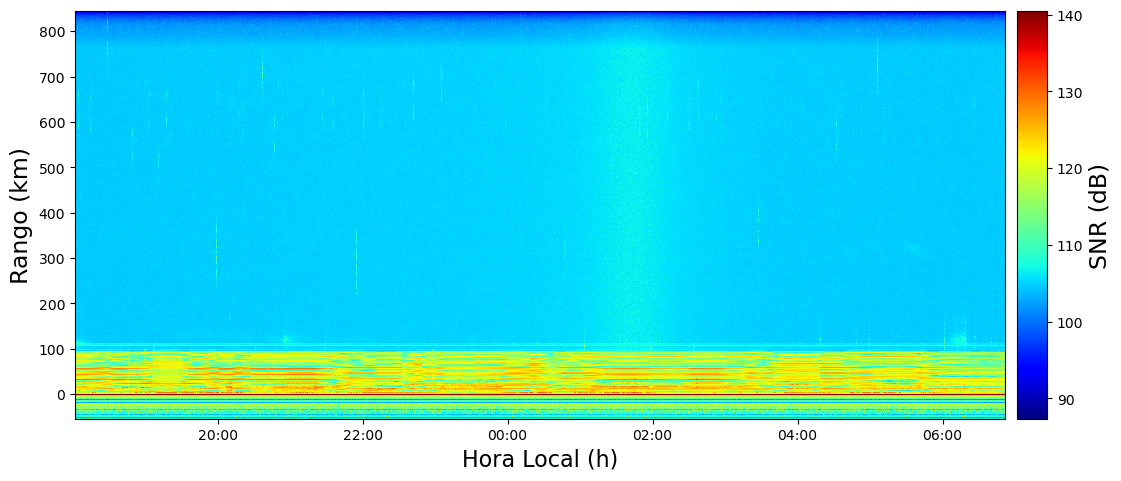

In [5]:
timestamps = np.array(hf['Data/utctime'])
arr = np.array(hf['Data/data_pow']['channel00'])#['day'])
rango = np.array(hf['Metadata/']['heightList'])
print(timestamps[-1])
PlotFlag = True
#a = calendar.timegm(time.strptime('%s %02d, 2022 @ 00:00:00 UTC' % ('Feb',day), '%b %d, %Y @ %H:%M:%S UTC'))
#timestamps = df[0]*3600+a+5*3600
datetime_objects = []
for ts in timestamps:
    date_time_obj = datetime.datetime.fromtimestamp(ts)
    datetime_objects.append(date_time_obj)
#datetime_objects = np.array(datetime_objects)#- timedelta(hours=5)
datetime_objects = pd.to_datetime(datetime_objects)
print(datetime_objects[0])
print(np.log10(arr))
index = pd.DatetimeIndex(datetime_objects) #- timedelta(hours=5)
#datetime_objects = np.array(datetime_objects,dtype='datetime64[ns]')
arr_total = arr#np.nansum(arr, axis=1)
    #'''
print("Último datetime object: ", datetime_objects[-1])
if PlotFlag==True:
    fig, ax = plt.subplots(figsize=(12, 6))
    clrs= ax.pcolormesh(mdates.date2num(datetime_objects[0:-16]),rango, 10*np.log10(arr_total.T[:,0:-16]),cmap='jet')#'RdBu_r')#'jet')
        #print("Punto de control 2")
    ax.xaxis_date()
    date_format = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel("Hora Local (h)", fontsize=16)
    ax.set_ylabel("Rango (km)", fontsize=17)
        #ax.set_xlim(-10,750)
    fig.autofmt_xdate()
    box=ax.get_position()
    cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
    cb=plt.colorbar(clrs,cax=cbarax)
    cb.set_label(r'SNR (dB)', fontsize=17)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 ,ha='center')
    plt.savefig('RTI-raro.png', bbox_inches="tight")
    plt.show()


In [6]:
count=0
#dt = pd.to_datetime(datetime_objects)[-1]
#print(dt.year)
#'''
for dt in datetime_objects:
    if dt.year==1969:
        count+=1
        print(dt)
print('Número de timestamps malos: ',count)
#'''

Número de timestamps malos:  0


In [7]:
datetime_objects[1]-datetime_objects[0]

Timedelta('0 days 00:00:20.000001')

In [8]:
print(datetime_objects[0],datetime_objects[-16] ,datetime_objects[-1])
print(datetime_objects.shape)

2022-07-04 18:02:02.000020 2022-07-05 06:51:42.000020 2022-07-05 06:56:42.000020
(2325,)


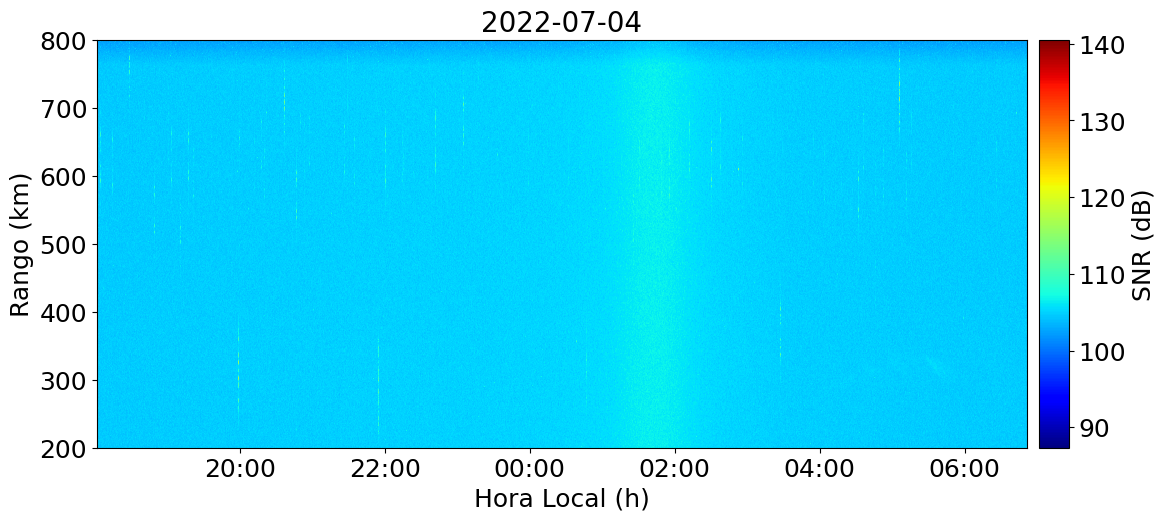

87.33554252727345 140.52445510337182


In [9]:
PlotFlag = True
datetime_objects, height_list, arr_total0 =GetTimeAndArray(directory,filename, PlotFlag)
print(np.min(arr_total0), np.max(arr_total0))

In [10]:
cut_off = 106
binMat = GetBinaryMatrix(arr_total0,cut_off)
#print(height_list[0], height_list[-1])
#plt.plot(height_list)
#print(datetime_objects.shape,height_list.shape, binMat.shape)
#d_prima = arr_total0.copy()
#d_prima[d_prima==np.nan]=0
#d_prima[d_prima!=np.nan]=1
#fils, cols = d_prima.shape
#matCount = np.zeros(d_prima.shape)
#for i in range(fils):
#    for j in range(cols):
#        if d_prima[i,j]<cut_off:#np.isnan(d_prima[i,j]):
#            d_prima[i,j]=0
            #matCount[i,j]+=1
            #print('A bin below the cut off value: ', d_prima[i,j])
#        else :
#            #print('A bin above the cut_off value: ', d_prima[i,j])
#            d_prima[i,j]=1
#            matCount[i,j]+=1

In [11]:
np.count_nonzero(binMat==0)

1100664

[None, None, None, None, None, None, None, None, None, None, None, None]

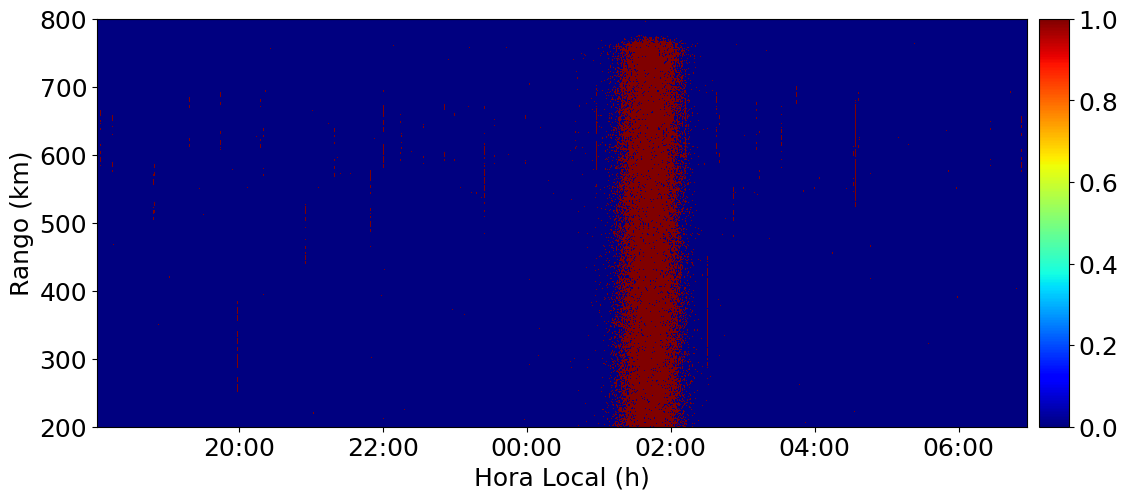

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
clrs= ax.pcolormesh(datetime_objects,height_list, binMat.T,cmap='jet')#'RdBu_r')#'jet')
#ax.set_title('%d-%02d-%02d' % (datetime_objects[0].year,datetime_objects[0].month,datetime_objects[0].day), fontsize=20)
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("Hora Local (h)", fontsize=18)
ax.set_ylabel("Rango (km)", fontsize=18)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(200,800)
fig.autofmt_xdate()
box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)
#cb.set_label(r'SNR (dB)', fontsize=18)
cb.ax.tick_params(labelsize=18)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 ,ha='center')


In [13]:
fils,cols = arr_total0.shape
arr_temp = np.zeros((fils,cols))
PlotFlag = False
cut_off = 106
plot_format= 'png'
print(directory)
count=0
for filename2 in sorted(os.listdir(directory)):
    if filename2.endswith(".hdf5"):
        print('========================================================')
        print(filename2)
        datetime_objects, height_list, arr_total =GetTimeAndArray(directory,filename2, PlotFlag)
        print("Shapes: ",np.array(datetime_objects).shape, arr_total.shape)
        print(datetime_objects[0], datetime_objects[-1])
        #arr_temp = arr_temp + 10*np.log10(arr_total)
        binMat = GetBinaryMatrix(arr_total,cut_off)
        #plt.pcolormesh(datetime_objects,height_list,binMat.T)
        #plt.show()
        arr_temp = arr_temp + binMat
        count+=1

Data/Data-Julio-2022
D2022185000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-04 18:02:02.000020 2022-07-05 06:56:42.000020
D2022186000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-05 18:03:26.000021 2022-07-06 06:58:06.000020
D2022189000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-08 18:00:19.000020 2022-07-09 06:54:59.000020
D2022190000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-09 18:00:19.000020 2022-07-10 06:54:59.000021
D2022202000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-21 18:04:33.000020 2022-07-22 06:59:13.000021
D2022203000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-22 18:04:33.000020 2022-07-23 06:59:13.000020
D2022204000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-23 18:04:33.000020 2022-07-24 06:59:13.000021
D2022205000.hdf5
Shapes:  (2325,) (2325, 600)
2022-07-24 18:04:33.000020 2022-07-25 06:59:13.000021


In [14]:
#print(2309-2294)
arr_final = 100*arr_temp/count
print(np.min(arr_final),np.max(arr_final))


0.0 100.0


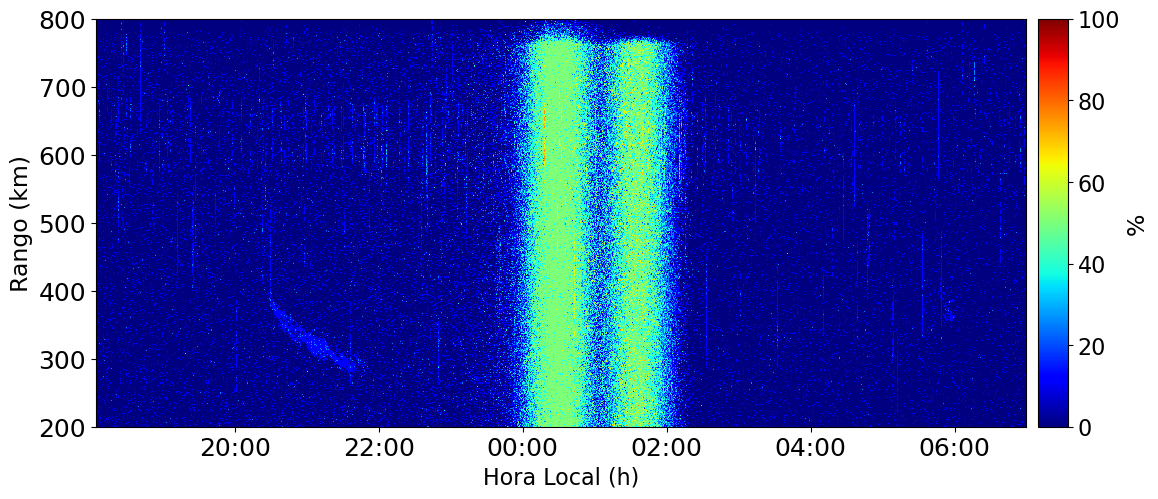

In [15]:
color_map = 'jet'
fig, ax = plt.subplots(figsize=(12, 6))
clrs= ax.pcolormesh(mdates.date2num(datetime_objects),height_list,arr_final.T,cmap=color_map,shading='auto')#'RdBu_r')#'jet')
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("Hora Local (h)", fontsize=16)
ax.set_ylabel("Rango (km)", fontsize=17)
ax.set_ylim(200,800)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
fig.autofmt_xdate()
box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)
cb.set_label(r'%', fontsize=17)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 ,ha='center')
cb.ax.tick_params(labelsize=16)
#cb.mappable.set_clim(0,30)
str_fig_png = '%s/mapa-de-ocurrencias-amisr-%s-%s.png' % (plots_boletin, current_month, color_map)
plt.savefig(str_fig_png,bbox_inches="tight")
#str_fig_pdf = '%s/mapa-de-ocurrencias-amisr-%s-%s.pdf' % (plots_boletin, current_month, color_map)
#plt.savefig(str_fig_pdf,bbox_inches="tight")

In [21]:
print(datetime_objects[1000],datetime_objects[1500])

2022-07-24 23:37:53.000021 2022-07-25 02:24:33.000021


In [29]:
occurMat = arr_final.copy()
print(occurMat.shape, datetime_objects.shape)
occurMat[1000:1500,:] = 0.1

(2325, 600) (2325,)


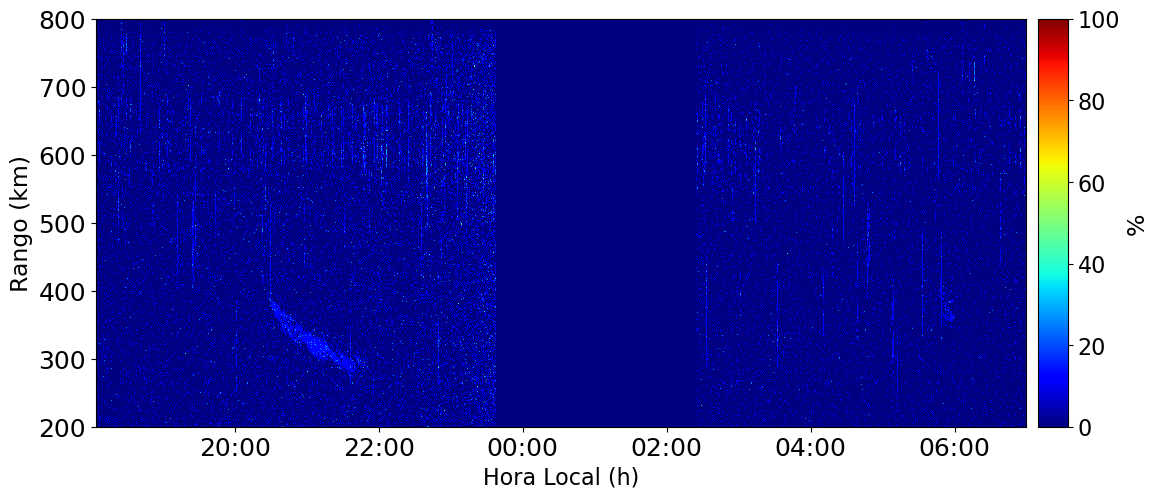

In [30]:
color_map = 'jet'
fig, ax = plt.subplots(figsize=(12, 6))
clrs= ax.pcolormesh(mdates.date2num(datetime_objects),height_list,occurMat.T,cmap=color_map,shading='auto')#'RdBu_r')#'jet')
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("Hora Local (h)", fontsize=16)
ax.set_ylabel("Rango (km)", fontsize=17)
ax.set_ylim(200,800)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
fig.autofmt_xdate()
box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)
cb.set_label(r'%', fontsize=17)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 ,ha='center')
cb.ax.tick_params(labelsize=16)